<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/CreatingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

Cloning into 'PythonForMachineLearning'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 275 (delta 61), reused 3 (delta 3), pack-reused 158 (from 1)
Receiving objects: 100% (275/275), 11.69 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [3]:
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
import pandas as pd

model_data = pd.read_csv("/content/PythonForMachineLearning/datasets/model_data.csv")
analize_data = pd.read_csv("/content/PythonForMachineLearning/datasets/analyze_data.csv")

print(model_data.columns.unique())

analyze_data = analize_data.drop(['ID'], axis=1)
model_data = model_data.drop(['ID'], axis=1)

Index(['ID', 'Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Alcohol', 'Amphetamine',
       'Amyl nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate',
       'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs',
       'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron',
       'Volatile substance abuse', 'Country_Australia', 'Country_Canada',
       'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland',
       'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
       'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White'],
      dtype='object')


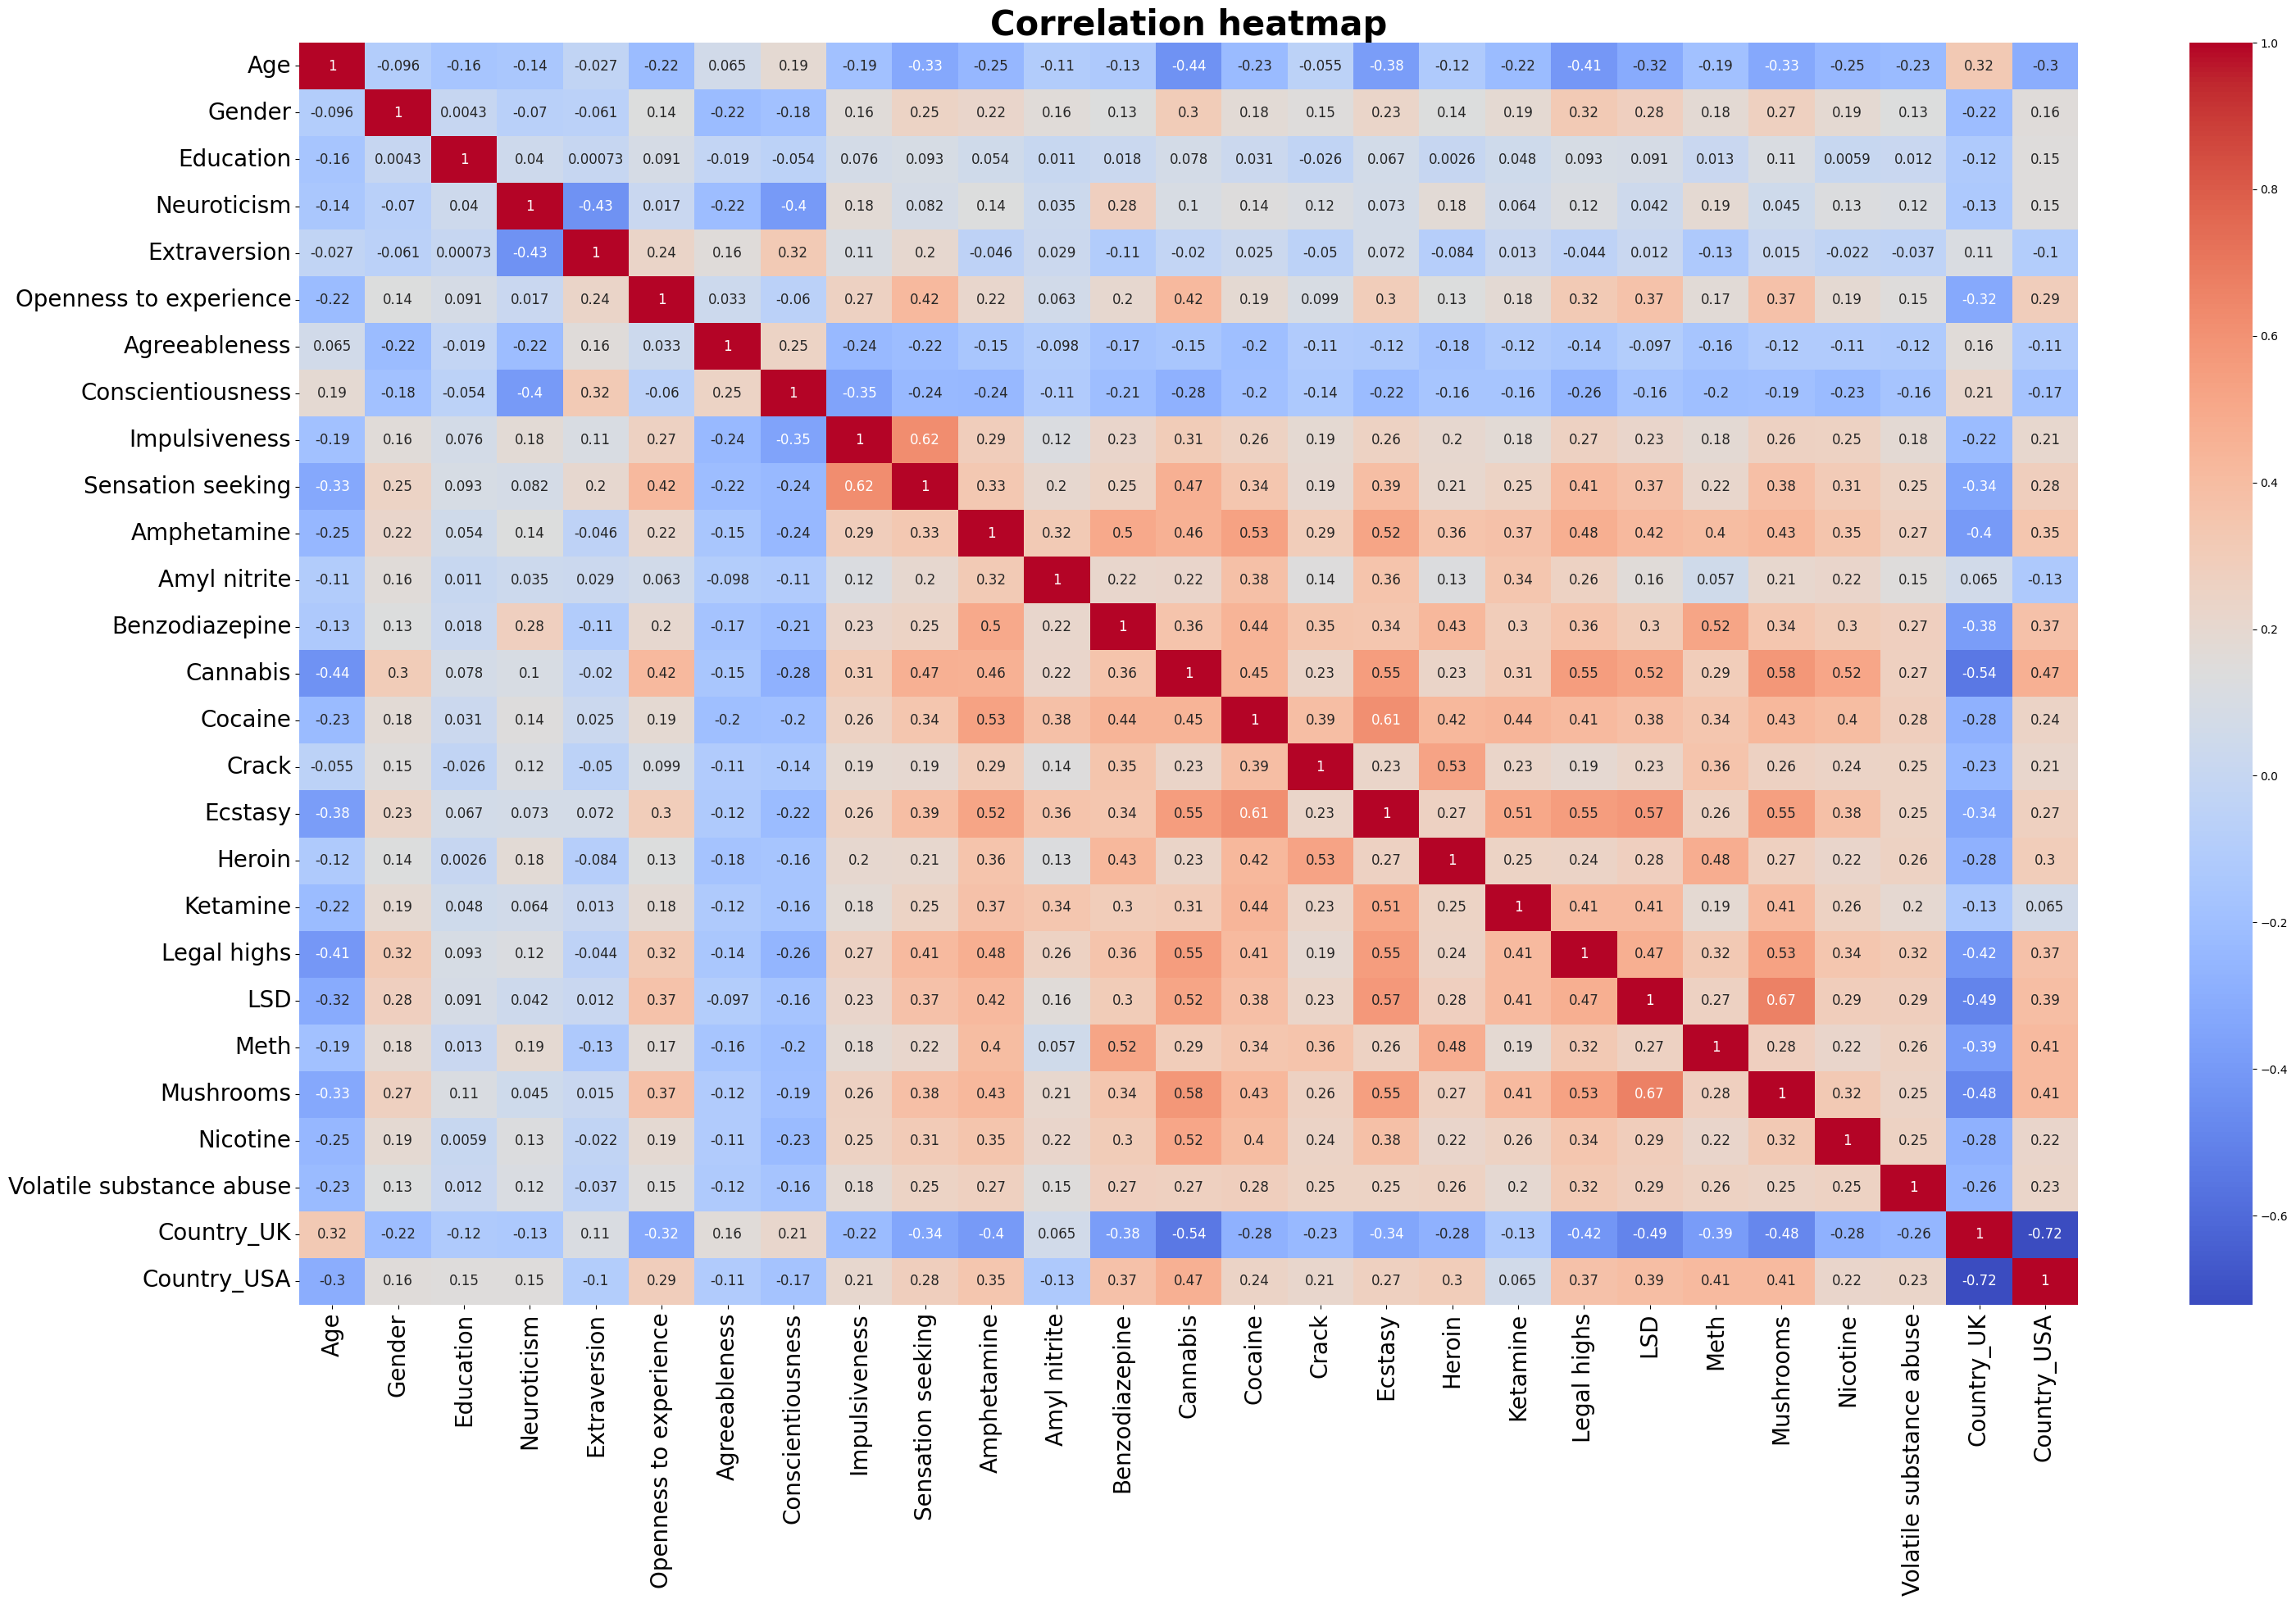

In [4]:
selected_model_data = model_data.copy()
selected_model_data = selected_model_data.loc[:, ~model_data.columns.str.startswith('Ethnicity')].drop(['Semeron', 'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Alcohol', 'Caffeine', 'Chocolate'], axis=1)

selected_corr = selected_model_data.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(selected_corr, cmap = 'coolwarm', annot = True, annot_kws={'size': 12})
plt.title('Correlation heatmap', fontsize=30, fontweight='bold')
plt.tick_params(axis='both', labelsize=20)
plt.show()

#Creating model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X= selected_model_data.drop(['Cannabis'], axis=1)
y= selected_model_data['Cannabis']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )

In [21]:
import numpy as np

reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.4101540851004386
1.564831888829659


In [22]:
print(selected_model_data.columns.unique())

Index(['Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Amphetamine', 'Amyl nitrite',
       'Benzodiazepine', 'Cannabis', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Volatile substance abuse', 'Country_UK', 'Country_USA'],
      dtype='object')


#Features - hard drugs

In [72]:
from sklearn.model_selection import train_test_split


X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)
y= selected_model_data['Cannabis']

X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X1.head()

Amphetamine  Amyl nitrite  Benzodiazepine  Cocaine  Crack  Ecstasy  Heroin  \
0            2             2               0        3      0        4       0   
1            0             0               0        0      0        0       0   
2            0             0               3        2      0        0       0   
3            1             1               0        0      0        1       0   
4            0             0               0        0      0        0       0   

   Ketamine  Legal highs  LSD  Meth  Mushrooms  Nicotine  \
0         2            0    2     3          0         4   
1         0            0    0     0          1         0   
2         2            0    0     0          0         2   
3         0            1    0     0          2         2   
4         0            0    0     0          0         6   

   Volatile substance abuse  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

 - Never Used = 0
 - Used over a Decade = 1
 - Used in Last Decade = 2
 - Used in Last Year = 3
 - Used in Last Month = 4
 - Used in Last Week = 5
 - Used in Last Day = 6

##PCA Data

In [64]:
from sklearn.decomposition import PCA

pca = PCA().set_output(transform="pandas").fit(X_train)
X1_train_pca = pca.transform(X_train)
X1_valid_pca = pca.transform(X_valid)
X1_test_pca = pca.transform(X_test)

In [66]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X1_train_pca, y_train)
y_pred_train = reg.predict(X1_train_pca)
y_pred = reg.predict(X1_valid_pca)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.3720631952731495
1.5065060489893123


In [70]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X1_train_pca, y_train)
y_pred_train = reg.predict(X1_train_pca)
y_pred = reg.predict(X1_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.305865572537454
1.4643866310185851


##Without PCA

###Tree

In [67]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.4602049263988777
1.5381028124317135


###SVM

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

###Kneighbours

In [42]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(5,5,5,5), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.2962324813566863
1.4782527897563091


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###Kneigbours

In [63]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=25)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.45643132772863
1.489136612758845


###SVM

In [54]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.335248703758876
1.468366075451459


#Features - Psychological tests

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)

X2= selected_model_data.drop(['Cannabis','Cocaine', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Volatile substance abuse'], axis=1)
y= selected_model_data['Cannabis']

standard_scaler = StandardScaler().set_output(transform="pandas")
X2_s = standard_scaler.fit_transform(X2)

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X2_n = minmax_scaler.fit_transform(X2)

X_train, X_test, y_train, y_test= train_test_split(X2_s, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X_train.head()

Age    Gender  Education  Neuroticism  Extraversion  \
1706  0.512350 -1.001062  -1.238857    -0.866922     -0.823779   
1646 -0.270511 -1.001062   0.950643     0.008773      1.539147   
1429 -0.270511 -1.001062  -0.363057     0.337159     -0.971461   
1439  0.512350 -1.001062  -2.552557    -0.538537      0.948415   
987  -1.053372  0.998939   0.512743     0.337159      1.686830   

      Openness to experience  Agreeableness  Conscientiousness  Impulsiveness  \
1706                0.795807      -0.911871           0.367921      -0.848961   
1646                1.251798       1.263161           0.655005       1.508012   
1429               -0.572168       2.350677           1.372713      -1.320355   
1439                0.795807       0.952442           0.655005      -0.848961   
987                 0.339815      -0.756511          -1.928747       1.979407   

      Sensation seeking  Amphetamine  Amyl nitrite  Benzodiazepine  \
1706          -0.208753    -0.751453     -0.570631       -0.784566   
1646           0.533306    -0.751453     -0.570631       -0.784566   
1429          -1.321842    -0.751453     -0.570631       -0.784566   
1439          -1.321842    -0.190765     -0.570631       -0.249014   
987            1.646394     1.491300      4.128096        0.822088   

      Country_UK  Country_USA  
1706    0.897958    -0.647876  
1646    0.897958    -0.647876  
1429    0.897958    -0.647876  
1439    0.897958    -0.647876  
987    -1.113638    -0.647876

##Without PCA

###KNeighbours

In [91]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=37)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.5507820967724348
1.551992230044609


###ML

In [105]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(7,6,6,6,6), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.3396523737700312
1.585029017191335


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


##PCA Data

In [106]:
from sklearn.decomposition import PCA

pca = PCA().set_output(transform="pandas").fit(X_train)
X2_train_pca = pca.transform(X_train)
X2_valid_pca = pca.transform(X_valid)
X2_test_pca = pca.transform(X_test)

###Tree

In [107]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.4569548703641766
1.6851186611309366


###SVM

In [108]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.3560631422055518
1.562224595333075


###ML

In [109]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(7,6,6,6,6), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.1871034077687186
1.8137111763935758


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###KNeighbours

In [110]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=37)
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.5507820967724348
1.551992230044609
